In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

from scipy import stats

import sys

import utils.trace_metric as trace_metric

In [91]:
with open('test_configs/results/trace_length_dict.pkl', 'rb') as f:
    trace_length_dict = pkl.load(f)

# Observations

- `pmd` exhibits jikes > j9 > hotspot for kl-divergence
- `pmd` exhibits same for negative log likelihood but the difference is small(look back into the graph of error analysis)
- MSE exhibits jikes > hotspot > j9

# PMD

In [92]:
seeds = [1, 3, 6, 9]

result = {}

with open('test_configs/results/result_5472916.pkl', 'rb') as f:
    result = pkl.load(f)
    
trace_list = result.keys()

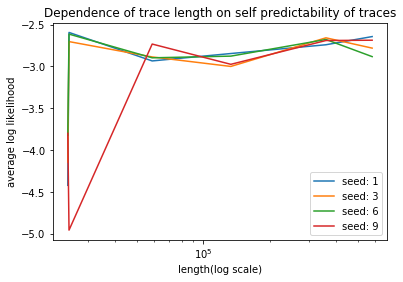

In [93]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
#         print("Trace: {}".format(trace))
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(-result[trace][trace][seed][key]["average_loglikelihood"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]][0])
        avgkl_list.append(average_kldiv)
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.plot(np.array(length_list)[sort_ids], 
                np.array(avgkl_list)[sort_ids], 
                label="seed: {}".format(seed))

plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on self predictability of traces")
# plt.show()
plt.savefig("trace_correlation.png")

## pmd-default only

In [94]:
trace_list_default = [ trace for trace in trace_list if trace.find('default') != -1 ]

trace_list_default

['pmd-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl']

In [95]:
trace_metric.get_metrics(result, trace_list_default, seeds, filename='kldiv_pmd_default.csv', 
                         compute_heatmap=False)
trace_metric.get_metrics(result, trace_list_default, seeds, filename='nll_pmd_default.csv', 
            compute_heatmap=False, metric="avg_trace_loglikelihood")

### Kl Divergence

In [137]:
df = pd.read_csv('test_configs/results/kldiv_pmd_default.csv')

trace_list = []
len_list = []

for trace in trace_list_default:
    trace_list.append(trace)
    len_list.append(trace_length_dict[trace.split('.p')[0]][0])

indices = np.argsort(len_list)
print(np.array(trace_list)[indices])
print(np.array(len_list)[indices])

df

['jython-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl']
[ 734705  749053 1289061]


,train|test,jython-default-J9,jython-default-HotSpot,jython-default-JikesRVM
0,jython-default-J9,nan | nan,0.4226 | 0.0283,0.3077 | 0.0353
1,jython-default-HotSpot,0.2492 | 0.0295,nan | nan,0.3157 | 0.0306
2,jython-default-JikesRVM,0.2690 | 0.0253,0.4479 | 0.0307,nan | nan


### negative Log likelihood

In [97]:
df = pd.read_csv('test_configs/results/nll_pmd_default.csv')

df

,train|test,pmd-default-JikesRVM,pmd-default-J9,pmd-default-HotSpot
0,pmd-default-JikesRVM,nan | nan,2.8001 | 0.0415,2.7763 | 0.0124
1,pmd-default-J9,2.9062 | 0.0355,nan | nan,2.6909 | 0.0169
2,pmd-default-HotSpot,3.0684 | 0.0887,2.7437 | 0.0558,nan | nan


### NLL

In [98]:
df = pd.read_csv('test_configs/results/mse_pmd_default.csv')

df

,train|test,pmd-default-JikesRVM,pmd-default-J9,pmd-default-HotSpot
0,pmd-default-JikesRVM,0.0004 | 0.0001,0.0025 | 0.0008,0.0031 | 0.0002
1,pmd-default-J9,0.0004 | 0.0001,0.0023 | 0.0007,0.0028 | 0.0002
2,pmd-default-HotSpot,0.0004 | 0.0001,0.0024 | 0.0007,0.0029 | 0.0001


## pmd-small

In [99]:
trace_list_small = [ trace for trace in trace_list if trace.find('small') != -1 ]

trace_list_small

['pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl']

In [100]:
trace_metric.get_metrics(result, trace_list_small, seeds, filename='kldiv_pmd_small.csv', 
                         compute_heatmap=False)

In [138]:
df = pd.read_csv('test_configs/results/kldiv_pmd_small.csv')

trace_list = []
len_list = []

for trace in trace_list_small:
    trace_list.append(trace)
    len_list.append(trace_length_dict[trace.split('.p')[0]][0])

indices = np.argsort(len_list)
print(np.array(trace_list)[indices])
print(np.array(len_list)[indices])

df

['jython-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl']
[171048 216840 544092]


,train|test,jython-small-J9,jython-small-HotSpot,jython-small-JikesRVM
0,jython-small-J9,nan | nan,0.3656 | 0.0314,0.9804 | 0.0922
1,jython-small-HotSpot,0.2558 | 0.0305,nan | nan,0.8592 | 0.1183
2,jython-small-JikesRVM,0.2920 | 0.0378,0.4086 | 0.0274,nan | nan


## pmd with Hotspot only

In [102]:
trace_list_hotspot = [ trace for trace in trace_list if trace.find('HotSpot') != -1 ]

trace_list_hotspot

['pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl']

In [103]:
trace_metric.get_metrics(result, trace_list_hotspot, seeds, filename='kldiv_pmd_Hotspot.csv', 
                         compute_heatmap=False)
trace_metric.get_metrics(result, trace_list_hotspot, seeds, filename='nll_pmd_Hotspot.csv',
           metric="avg_trace_loglikelihood", compute_heatmap=False)

### KL Divergence

In [139]:
df = pd.read_csv('test_configs/results/kldiv_pmd_Hotspot.csv')

trace_list = []
len_list = []

for trace in trace_list_hotspot:
    trace_list.append(trace)
    len_list.append(trace_length_dict[trace.split('.p')[0]][0])

indices = np.argsort(len_list)
print(np.array(trace_list)[indices])
print(np.array(len_list)[indices])

df

['jython-small-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl']
[216840 749053]


,train|test,jython-default-HotSpot,jython-small-HotSpot
0,jython-default-HotSpot,nan | nan,0.3490 | 0.0320
1,jython-small-HotSpot,0.3973 | 0.0309,nan | nan


### MSE

In [105]:
df = pd.read_csv('test_configs/results/nll_pmd_Hotspot.csv')

df

,train|test,pmd-small-HotSpot,pmd-default-HotSpot
0,pmd-small-HotSpot,nan | nan,2.6821 | 0.0168
1,pmd-default-HotSpot,3.0346 | 0.3963,nan | nan


## pmd with J9

In [106]:
trace_list_j9 = [ trace for trace in trace_list if trace.find('J9') != -1 ]

trace_list_j9

['pmd-small-J9-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl']

In [107]:
trace_metric.get_metrics(result, trace_list_j9, seeds, filename='kldiv_pmd_j9.csv',
                         compute_heatmap=False)

In [108]:
df = pd.read_csv('test_configs/results/kldiv_pmd_j9.csv')

df

,train|test,pmd-small-J9,pmd-default-J9
0,pmd-small-J9,nan | nan,0.2989 | 0.0731
1,pmd-default-J9,0.3921 | 0.0520,nan | nan


## pmd with JikesRVM

In [109]:
trace_list_jikes = [ trace for trace in trace_list if trace.find('JikesRVM') != -1 ]

trace_list_jikes

['pmd-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl',
 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl']

In [110]:
trace_metric.get_metrics(result, trace_list_jikes, seeds, filename='kldiv_pmd_jikes.csv', compute_heatmap=False)

In [111]:
df = pd.read_csv('test_configs/results/kldiv_pmd_jikes.csv')

df

,train|test,pmd-default-JikesRVM,pmd-small-JikesRVM
0,pmd-default-JikesRVM,nan | nan,1.5755 | 0.1453
1,pmd-small-JikesRVM,0.4239 | 0.0321,nan | nan


# LUINDEX

In [140]:
seeds = [1, 3, 6, 9]

result = {}

with open('test_configs/results/result_5811256.pkl', 'rb') as f:
    result = pkl.load(f)
    
trace_list = result.keys()

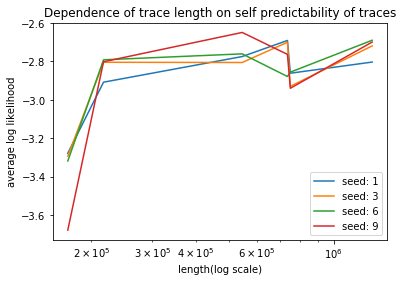

In [141]:
for seed in seeds:
    length_list = []
    avgkl_list = []
#     print("Seed: {}".format(seed))
    for trace in trace_list:
#         print("Trace: {}".format(trace))
        
        test_kldiv = []
        
#         print(result[trace][trace][seed].keys())
        
        for key in result[trace][trace][seed].keys():
#             print("key: {}".format(key))
#             print(result[trace][trace][seed][key]["average_kldivergence"])
            try:
                test_kldiv.append(-result[trace][trace][seed][key]["average_loglikelihood"])
            except IndexError:
                continue
        
        average_kldiv = np.mean(test_kldiv)
#         print("Kl divergence: {}".format(average_kldiv))
        
        length_list.append(trace_length_dict[trace.split('.p')[0]][0])
        avgkl_list.append(average_kldiv)
    
    sort_ids = np.argsort(length_list)
#     print(sort_ids)
    
    plt.plot(np.array(length_list)[sort_ids], 
                np.array(avgkl_list)[sort_ids], 
                label="seed: {}".format(seed))

plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on self predictability of traces")
# plt.show()
plt.savefig("trace_correlation.png")

## luindex-default only

In [142]:
trace_list_default = [ trace for trace in trace_list if trace.find('default') != -1 ]

trace_list_default

['jython-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl',
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl',
 'jython-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl']

In [143]:
trace_metric.get_metrics(result, trace_list_default, seeds, filename='kldiv_pmd_default.csv', 
                         compute_heatmap=False)
trace_metric.get_metrics(result, trace_list_default, seeds, filename='nll_pmd_default.csv', 
            compute_heatmap=False, metric="avg_trace_loglikelihood")

/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/arjun/anaconda2/envs/cache_analysis/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Kl Divergence

In [144]:
df = pd.read_csv('test_configs/results/kldiv_pmd_default.csv')

trace_list = []
len_list = []

for trace in trace_list_default:
    trace_list.append(trace)
    len_list.append(trace_length_dict[trace.split('.p')[0]][0])

indices = np.argsort(len_list)
print(np.array(trace_list)[indices])
print(np.array(len_list)[indices])

df

['jython-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl'
 'jython-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl']
[ 734705  749053 1289061]


,train|test,jython-default-J9,jython-default-HotSpot,jython-default-JikesRVM
0,jython-default-J9,nan | nan,0.4226 | 0.0283,0.3077 | 0.0353
1,jython-default-HotSpot,0.2492 | 0.0295,nan | nan,0.3157 | 0.0306
2,jython-default-JikesRVM,0.2690 | 0.0253,0.4479 | 0.0307,nan | nan


### negative Log likelihood

In [145]:
df = pd.read_csv('test_configs/results/nll_pmd_default.csv')

df

,train|test,jython-default-J9,jython-default-HotSpot,jython-default-JikesRVM
0,jython-default-J9,nan | nan,2.8811 | 0.0268,2.8142 | 0.0492
1,jython-default-HotSpot,2.7302 | 0.0311,nan | nan,2.8018 | 0.0305
2,jython-default-JikesRVM,2.7576 | 0.0292,2.9272 | 0.0290,nan | nan


### NLL

In [146]:
df = pd.read_csv('test_configs/results/mse_pmd_default.csv')

df

,train|test,pmd-default-JikesRVM,pmd-default-J9,pmd-default-HotSpot
0,pmd-default-JikesRVM,0.0004 | 0.0001,0.0025 | 0.0008,0.0031 | 0.0002
1,pmd-default-J9,0.0004 | 0.0001,0.0023 | 0.0007,0.0028 | 0.0002
2,pmd-default-HotSpot,0.0004 | 0.0001,0.0024 | 0.0007,0.0029 | 0.0001


## luindex-small

In [147]:
trace_list_small = [ trace for trace in trace_list if trace.find('small') != -1 ]

trace_list_small

[]

In [148]:
trace_metric.get_metrics(result, trace_list_small, seeds, filename='kldiv_pmd_small.csv', 
                         compute_heatmap=False)

In [149]:
df = pd.read_csv('test_configs/results/kldiv_pmd_small.csv')

df

,train|test,jython-small-J9,jython-small-HotSpot,jython-small-JikesRVM
0,jython-small-J9,nan | nan,0.3656 | 0.0314,0.9804 | 0.0922
1,jython-small-HotSpot,0.2558 | 0.0305,nan | nan,0.8592 | 0.1183
2,jython-small-JikesRVM,0.2920 | 0.0378,0.4086 | 0.0274,nan | nan


## luindex with Hotspot only

In [150]:
trace_list_hotspot = [ trace for trace in trace_list if trace.find('HotSpot') != -1 ]

trace_list_hotspot

['jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1.pkl']

In [151]:
trace_metric.get_metrics(result, trace_list_hotspot, seeds, filename='kldiv_pmd_Hotspot.csv', 
                         compute_heatmap=False)
trace_metric.get_metrics(result, trace_list_hotspot, seeds, filename='nll_pmd_Hotspot.csv',
           metric="avg_trace_loglikelihood", compute_heatmap=False)

### KL Divergence

In [152]:
df = pd.read_csv('test_configs/results/kldiv_pmd_Hotspot.csv')

df

,train|test,jython-default-HotSpot
0,jython-default-HotSpot,nan | nan


### MSE

In [153]:
df = pd.read_csv('test_configs/results/nll_pmd_Hotspot.csv')

df

,train|test,jython-default-HotSpot
0,jython-default-HotSpot,nan | nan


## luindex with J9

In [154]:
trace_list_j9 = [ trace for trace in trace_list if trace.find('J9') != -1 ]

trace_list_j9

['jython-default-J9-d-l64-p4096-w100000i.analyzed-1.pkl']

In [155]:
trace_metric.get_metrics(result, trace_list_j9, seeds, filename='kldiv_pmd_j9.csv',
                         compute_heatmap=False)

In [156]:
df = pd.read_csv('test_configs/results/kldiv_pmd_j9.csv')

df

,train|test,jython-default-J9
0,jython-default-J9,nan | nan


## luindex with JikesRVM

In [157]:
trace_list_jikes = [ trace for trace in trace_list if trace.find('JikesRVM') != -1 ]

trace_list_jikes

['jython-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl']

In [158]:
trace_metric.get_metrics(result, trace_list_jikes, seeds, filename='kldiv_pmd_jikes.csv', compute_heatmap=False)

In [159]:
df = pd.read_csv('test_configs/results/kldiv_pmd_jikes.csv')

df

,train|test,jython-default-JikesRVM
0,jython-default-JikesRVM,nan | nan
